In [2]:
#All the library imports that we needed for this project are included here.
from keras import models, layers, optimizers
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications import VGG16
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil
import skimage.io
from PIL import Image

In [3]:
#Loading the train and test csv data files as dataframes.
train_dataset = pd.read_csv('./dataset/train.csv')
test_dataset = pd.read_csv('./dataset/test.csv')

print("Length of training data is:", train_dataset.shape[0])
print("Length of testing data is:", test_dataset.shape[0])

#debug purpose.
#print("\nSummary of first 10 rows of train data:")
#train_dataset.head(10)

Length of training data is: 3662
Length of testing data is: 1928


In [4]:
#Splitting the training dataset into training and validation dataset.
#Approximately 30% is held out for validation and remaining 70% is used for training the models.
validation_dataset =train_dataset.iloc[:1200,:]
print("Validation set size:" ,validation_dataset.shape[0])

train_dataset = train_dataset.iloc[1200:,:]
print("Training set size:" ,train_dataset.shape[0])

#debug purpose.
#print(validation_dataset)
#debug purpose.
#print(train_dataset)

Validation set size: 1200
Training set size: 2462


In [5]:
#Split the training data & validation data each into 5 respective classes using the diagnosis variable from the training data.
class_train = []
class_val = []

for i in range(5):
    class_train.append(train_dataset[train_dataset['diagnosis'] == i]['id_code'].tolist())
    class_val.append(validation_dataset[validation_dataset['diagnosis'] == i]['id_code'].tolist())

#Concatenate .png extension at the end of each id to use this as a filename.
class_train = [[file_id + '.png' for file_id in class_n] for class_n in class_train]
class_val = [[file_id + '.png' for file_id in class_n] for class_n in class_val]

for i,class_n in enumerate(class_train):
    print("Length of training data in class",i,":", len(class_n))

print("")

for i,class_n in enumerate(class_val):
    print("Length of validation data in class",i,":", len(class_n))

Length of training data in class 0 : 1249
Length of training data in class 1 : 244
Length of training data in class 2 : 641
Length of training data in class 3 : 126
Length of training data in class 4 : 202

Length of validation data in class 0 : 556
Length of validation data in class 1 : 126
Length of validation data in class 2 : 358
Length of validation data in class 3 : 67
Length of validation data in class 4 : 93


In [9]:
#Original path to images directory.
train_dataset_dir = './dataset/train_images/'
test_dataset_dir = './dataset/test_images/'

#New directory for later use.
new_dataset_dir = './new_dataset/'

train_dir = os.path.join(new_dataset_dir, 'train')
#Create new directories for the labelled training data we have.
for i in range(5):
    new_folder = os.path.join(train_dir, 'class' + str(i))
    os.makedirs(new_folder, exist_ok=True)

#Create a copy of our training images to the new directories.
for i in range(5):
    for file_id in class_train[i]:
        src = os.path.join(train_dataset_dir, file_id)
        dst = os.path.join(train_dir, 'class' +  str(i), file_id)
        shutil.copy(src, dst)

val_dir= os.path.join(new_dataset_dir, 'val')
#Create new directories for the labelled validation data we have.
for i in range(5):
    new_folder = os.path.join(val_dir, 'class' + str(i))
    os.makedirs(new_folder, exist_ok=True)

#Create a copy of our validation images to the new directories.
for i in range(5):
    for file_id in class_val[i]:
        src = os.path.join(train_dataset_dir, file_id)
        dst = os.path.join(val_dir, 'class' +  str(i), file_id)
        shutil.copy(src, dst)

Class: [0] Height: 1050 Width: 1050
Class: [1] Height: 1958 Width: 2588
Class: [2] Height: 1226 Width: 1844
Class: [3] Height: 1944 Width: 2896
Class: [4] Height: 1958 Width: 2588


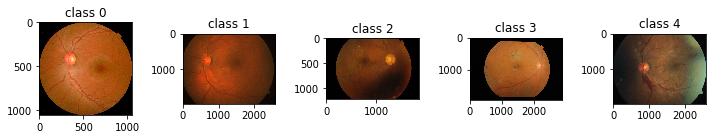

In [10]:
#Load the images into the workspace.
new_dataset_dir = './new_dataset/train/'
fig=plt.figure(figsize=(10,7))
rows=1
columns=5
#Displaying an example image for each class and their respective size.
for i in range(5):
    folder_path = os.path.join(new_dataset_dir, 'class' + str(i)+"/")
    Image_Id=os.listdir(folder_path)[i]
    Image_path=folder_path+Image_Id
    image = skimage.io.imread(Image_path)
    fig.add_subplot(rows,columns,i+1)
    skimage.io.imshow(image)
    plt.title("class "+ str(i))
    print("Class:",[i],"Height:", image.shape[0], "Width:", image.shape[1])

In [11]:
#Since the image sizes vary, we are resizing these so that all the images have uniform size before feeding those to the models.
print("Resizing images:")
train_folder = './new_dataset/train/'
val_folder = './new_dataset/val/'
test_folder = './dataset/test_images/'
w = 200
h = 200

#Resizing training data images.
print("Resizing all training data images")
for i in range(5):
    folder_path = os.path.join(train_folder, 'class' + str(i)+"/")
    #print("Resizing class",str(i),"training images")
    for j in os.listdir(folder_path):
        file = f"{folder_path}\\{j}"
        im = Image.open(file)
        im = im.resize((w, h), Image.LANCZOS)
        im.save(file)
    #print("Done resizing class",str(i),"training images")
print("Done resizing all training data images")

#Resizing validation data images.
print("Resizing all validation data images")
for i in range(5):
    folder_path = os.path.join(val_folder, 'class' + str(i)+"/")
    #print("Resizing class",str(i),"validation images")
    for j in os.listdir(folder_path):
        file = f"{folder_path}\\{j}"
        im = Image.open(file)
        im = im.resize((w, h), Image.LANCZOS)
        im.save(file)
    #print("Done resizing class",str(i),"validation images")
print("Done resizing all validation data images")

#Resizing test data images.
print("Resizing all testing data images")
for j in os.listdir(test_folder):
    file = f"{test_folder}\\{j}"
    im = Image.open(file)
    im = im.resize((w, h), Image.LANCZOS)
    im.save(file)
print("Done resizing all testing data images")

Resizing images:
Resizing all training data images
Resizing all training data images
Resizing all training data images
Resizing all training data images
Resizing all training data images
Done resizing all training data images
Resizing all validation data images
Resizing all validation data images
Resizing all validation data images
Resizing all validation data images
Resizing all validation data images
Done resizing all validation data images
Resizing all testing data images
Done resizing all testing data images


Class: [0] Height: 200 Width: 200
Class: [1] Height: 200 Width: 200
Class: [2] Height: 200 Width: 200
Class: [3] Height: 200 Width: 200
Class: [4] Height: 200 Width: 200


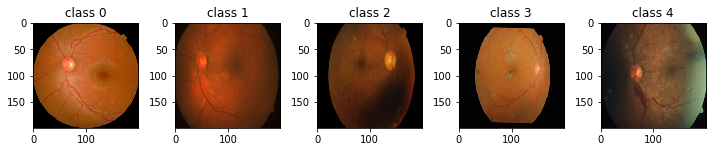

In [12]:
#Load the images into the workspace.
new_dataset_dir = './new_dataset/train/'
fig=plt.figure(figsize=(10,7))
rows=1
columns=5
#Displaying the same examples after resizing. 
for i in range(5):
    folder_path = os.path.join(new_dataset_dir, 'class' + str(i)+"/")
    Image_Id=os.listdir(folder_path)[i]
    Image_path=folder_path+Image_Id
    image = skimage.io.imread(Image_path)
    fig.add_subplot(rows,columns,i+1)
    skimage.io.imshow(image)
    plt.title("class "+ str(i))
    print("Class:",[i],"Height:", image.shape[0], "Width:", image.shape[1])

In [13]:
#Image Augmentation.
datatype = ['train','val']
class_aug = [1,3,4]

for data in datatype:
    for i in class_aug:
        image_dir = './new_dataset/' + str(data) + '/class' + str(i)

        #Iterating through all the images in the directory to generate augmented images.
        for filename in os.listdir(image_dir):
            img = load_img(os.path.join(image_dir, filename))
            img_90 = img.rotate(90)
            img_90.save(os.path.join(image_dir, 'aug_90_' + filename))
            
            img_180 = img.rotate(180)
            img_180.save(os.path.join(image_dir, 'aug_180_' + filename))
            
            img_270 = img.rotate(270)
            img_270.save(os.path.join(image_dir, 'aug_270_' + filename))

In [ ]:
#Build model with convolution layers, pooling, and normalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))
print(model.summary())